<a href="https://colab.research.google.com/github/s-eun-young-g/MachineLearning_6.3900/blob/main/pca_tsne_umap_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opentsne
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 16.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data(X, label, s=10):
  return plt.scatter(X[:,0], X[:,1], c=label, s=s)


<h1>Moons Data</h1>

Let's visualize a simple 2D dataset.

(1000, 2) (1000,)


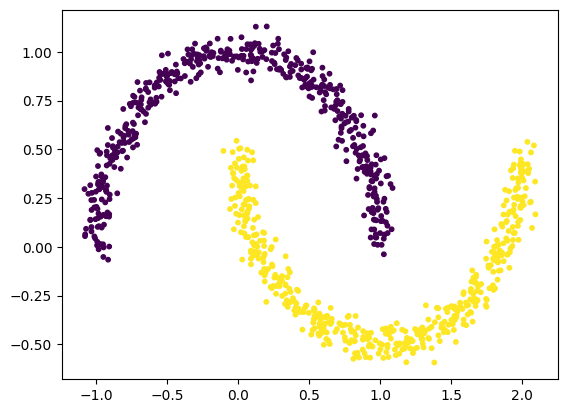

In [ ]:
from sklearn.datasets import make_moons

X, label = make_moons(1000, noise=0.05, random_state=86)

print(X.shape, label.shape) # check shape

plt.figure()
plot_data(X,label)

Here, we see two clusters that are very well separated.
Let's see what happens when we apply PCA, t-SNE, and UMAP.

For PCA, we will use the scikit-learn package (sklearn). Documentation available here: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Text(0.5, 1.0, 'PCA')

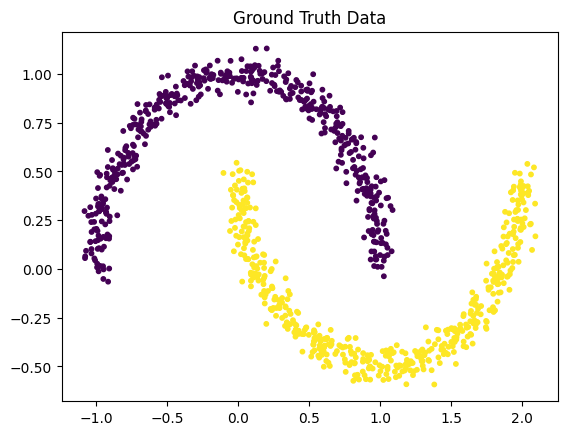

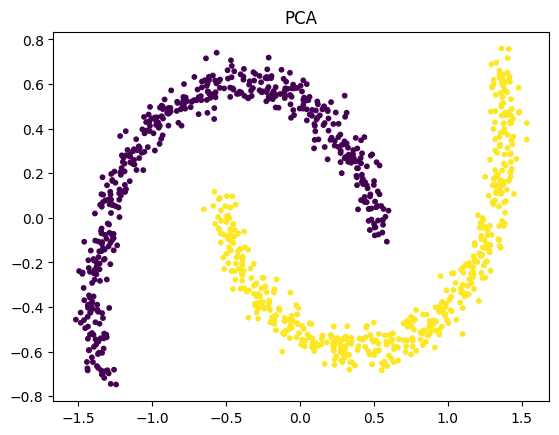

In [ ]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(X)
X_PCA = model.transform(X)

# plot time
plt.figure()
plot_data(X,label)
plt.title('Ground Truth Data')
plt.figure()
plot_data(X_PCA,label)
plt.title('PCA')

<h2>Q1: What is the primary difference between the two plots? Does the PCA plot give us any more information than the ground truth plot?</h2>

A1: The primary difference is the PCA plot is rotated such that the greates variance lies on the horizontal axis. The overall shape and class separation remained the same. PCA can only do linear transformations; since the moons are non-linear in shape, PCA doesn't actually reveal any new information to us. It just obscures the original coordinate system without unrolling or providing other insights on the data.

Now, we will use t-SNE and UMAP.

For t-SNE, we will use the openTSNE package (https://opentsne.readthedocs.io/en/stable/examples/01_simple_usage/01_simple_usage.html), which is currently the standard Python package for this algorithm.

For UMAP, we will use the umap-learn package (https://umap-learn.readthedocs.io/en/latest/parameters.html), the standard Python package for UMAP.

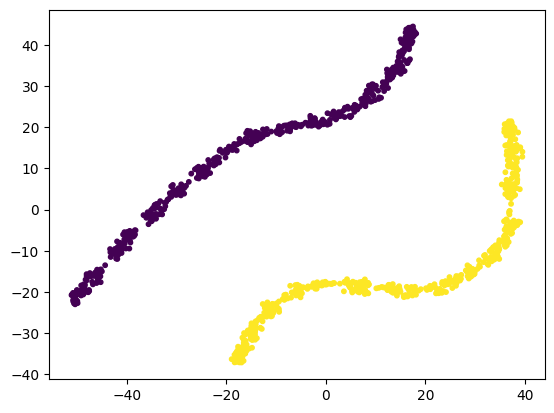

In [ ]:
from openTSNE import TSNE

model = TSNE(n_components=2,
             perplexity=30,
             metric="euclidean",
             random_state=32423,
             )

X_TSNE = model.fit(X)

plt.figure()
plot_data(X_TSNE, label)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


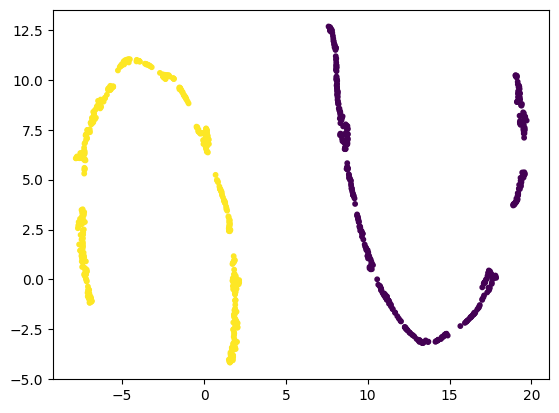

In [ ]:
from umap import UMAP

model = UMAP(n_components=2,
             n_neighbors=15,
             random_state=32423 # reproducability, comment out for speed
             )
X_UMAP = model.fit_transform(X)

plt.figure()
plot_data(X_UMAP, label)

Text(0.5, 1.0, 'UMAP')

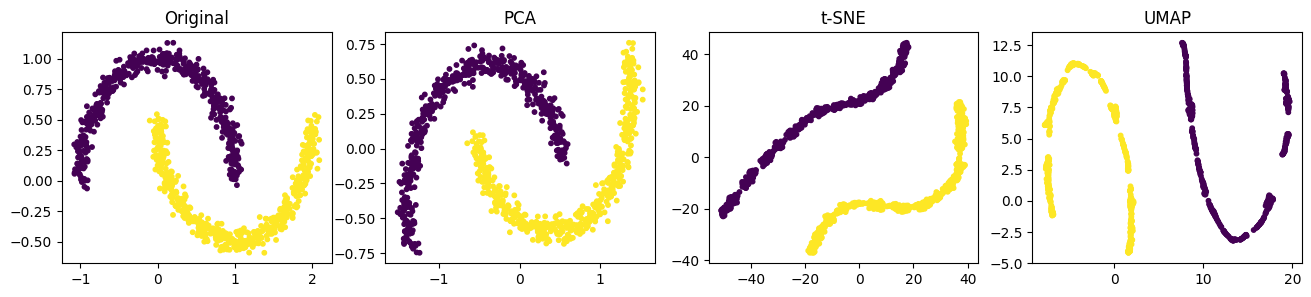

In [ ]:
# side by side plots

plt.figure(figsize=(16,3))
plt.subplot(1,4,1)
plot_data(X,label)
plt.title('Original')
plt.subplot(1,4,2)
plot_data(X_PCA,label)
plt.title('PCA')
plt.subplot(1,4,3)
plot_data(X_TSNE,label)
plt.title('t-SNE')
plt.subplot(1,4,4)
plot_data(X_UMAP,label)
plt.title('UMAP')

<h2>Q2: What are the primary differences among the four? What are the dominant features you see in the data? Compared to the original, which one is most faithful and which one is most misleading?</h2>
A2: As we stated before, PCA minimally alters the geometry of the data and does not reveal any new information. It's the most faithful, but t's not doing much beyond that. t-SNE is the most misleading transformation—it basically only preserves the fact the datasets are separated. Other than that, we can see it distorts the shapes of the data (no long arches, weird squiggles) and renders the distance between the clusters basically meaningless/inaccurate. UMAP is the middle ground. It warps the arches, which again renders global distances not usable, however, it maintain the general geometric shape of the moons, just with stretching. It also maintains the separation between the groups and also converted the graph into one that is linearly separable. We could now draw a straight line down the middle, which can be quite useful!

<h1>Swiss Roll</h1>
Now we will look at a 3 dimensional data.
It is a famous shape called swiss roll and an important toy dataset for algebraic topology or topological data analysis.

(2000, 3) (2000,)


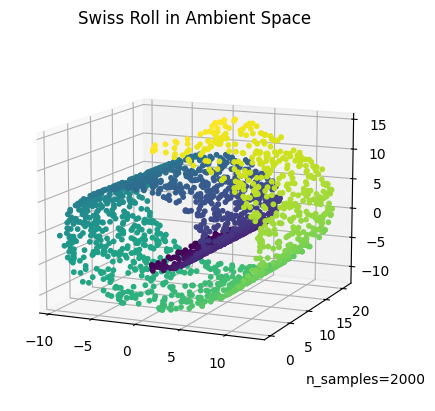

In [ ]:
from sklearn.datasets import make_swiss_roll

X,label = make_swiss_roll(n_samples=2000, random_state=987)

print(X.shape, label.shape)

# and plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    X[:, 0], X[:, 1], X[:, 2], c=label, s=10, alpha=1.0,
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=2000", transform=ax.transAxes)

In [ ]:
# PCA, tSNE, UMAP

from sklearn.decomposition import PCA
model = PCA(n_components=2)
X_PCA = model.fit_transform(X)

from openTSNE import TSNE
model = TSNE(n_components=2,
             perplexity=30,
             metric="euclidean",
             random_state=32423,
             )
X_TSNE = model.fit(X)

from umap import UMAP
model = UMAP(n_components=2,
             n_neighbors=15,
             random_state=32423
             )
X_UMAP = model.fit_transform(X)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Text(0.5, 1.0, 'UMAP')

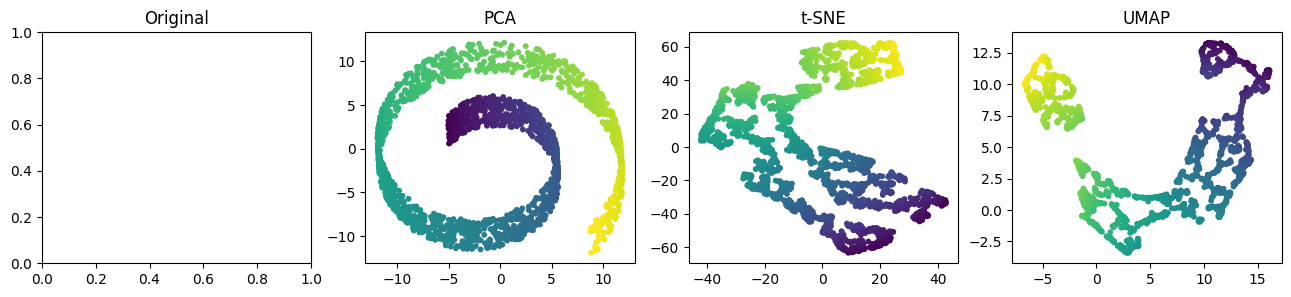

In [ ]:
# side by side plots

plt.figure(figsize=(16,3))
plt.subplot(1,4,1)
#plot_data(X,label)
plt.title('Original')
plt.subplot(1,4,2)
plot_data(X_PCA,label)
plt.title('PCA')
plt.subplot(1,4,3)
plot_data(X_TSNE,label)
plt.title('t-SNE')
plt.subplot(1,4,4)
plot_data(X_UMAP,label)
plt.title('UMAP')

<h2>Q3: (a) What is the main property of Swiss roll data? Often, it is cited that this data is 2D in a 3D space. What does that mean? (b) Of the transformations, which one do you think is the most faithful in capturing the properties of the Swiss roll data and why?</h2>
A3 (a): Swiss roll data is parametrized usually such that x and y depend on one variable (typically in the form of x = tcos(t) and y = tsin(t)) and z depends on another, h (typically z = h). So, while the swiss roll exists in the 3D space, each point is determined only by two variables (t, h), hence in this way, it is 2D. We aim to unroll the swiss roll and map it on (t, h) axes.

A3 (b): We can see once again that PCA is the most faithful, maintaining the most of the original geomtry by far. We can also see it maintained the color gradient/point ordering. In flattening it to 2D, PCA did still result in some compression/overlap, but the roll is intact.

<h2>Q4: Before we move on to the next dataset, tell us about your assessment of these methods? In general, which one do you think keeps the data properties more faithful?</h2>
A4:

PCA: like with the two moons data, as PCA can only perform linear transformations, it did not unroll the Swiss roll. It kepts its geometry the most intact, but again, did not really reveal any new or useful information to us.

t-SNE: t-SNE did not do as well presevering the Swiss roll. We see almost two C-shaped layers that fragmented from one another. We can see from the color gradient that point order was at least somewhat preserved (clear gradient). However, between the clumping within the layers and the fact we have two layers at all, we can see that local neighborhoods were prioritized and global distances were exaggerated, and therefore do not necessarily provide useful information.

UMAP: UMAP here seemed to preserve local neighborhoods even more aggressively than t-SNE. We see compact clusters that are almost dot-like with lots of white space, a full disconnected island, and weak linking between the rest of what remains of the roll. Again, the color gradient tells us that at least point ordering was somewhat preserved.

t-SNE and UMAP both dismantle the original topology of the swiss roll, however, they provide better information on clustering/separation than PCA, which is the most faithful to the original data properties.

<h1>Hand Written Digits</h1>

We will look into a collection of 60,000 handwritten digits.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)
(60000, 784) (60000,)


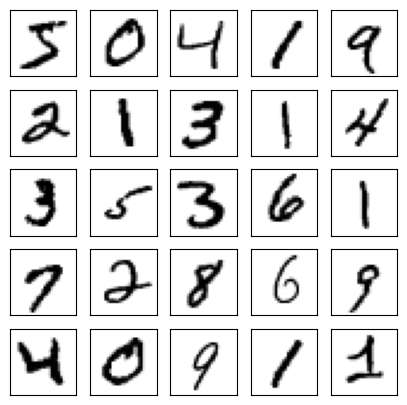

In [ ]:
import tensorflow as tf
from tensorflow import keras

# load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# get dataset shapes
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

plt.figure(figsize=(5,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)

# train
X = x_train.reshape(x_train.shape[0],-1)
label = y_train

print(X.shape, label.shape)
# 60,000 points in 784 dimensions

In [ ]:

# PCA, tSNE, UMAP

X = x_train.reshape(-1, 28*28).astype("float32") / 255.0
y = y_train

from sklearn.decomposition import PCA
pca50 = PCA(n_components=50, random_state=0)
X_PCA50 = pca50.fit_transform(X) # using PCA to preprocess so t-SNE and UMAP don't take literally forever

pca = PCA(n_components=2, random_state=0)
X_PCA = pca.fit_transform(X)

from openTSNE import TSNE
tsne = TSNE(n_components=2,
             perplexity=75,
             initialization="pca",
             metric="euclidean",
             random_state=32423,
             )
X_TSNE = tsne.fit(X_PCA50)

from umap import UMAP
umap_model = UMAP(n_components=2,
             n_neighbors=40,
             init="pca",
             min_dist=0.1,
             random_state=32423
             )
X_UMAP = umap_model.fit_transform(X_PCA50)


# code for plot is given below

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


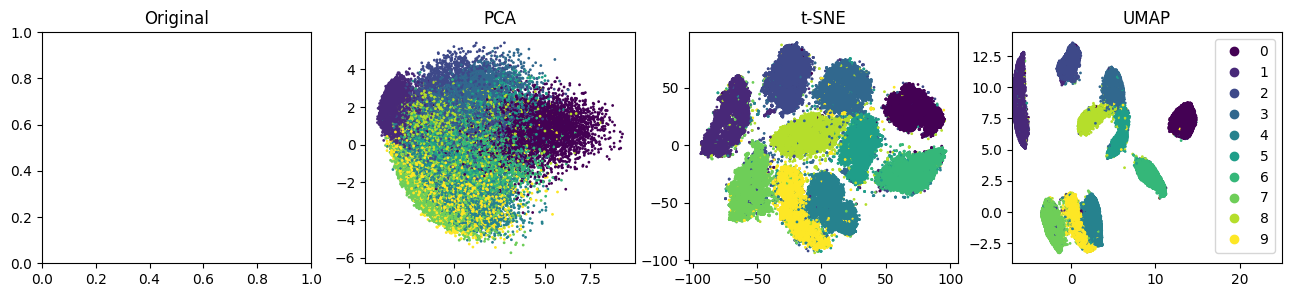

In [ ]:
plt.figure(figsize=(16,3))
plt.subplot(1,4,1)
#plot_data(X,label)
plt.title('Original')
plt.subplot(1,4,2)
plot_data(X_PCA,label, s=1)
plt.title('PCA')
plt.subplot(1,4,3)
plot_data(X_TSNE,label, s=1)
plt.title('t-SNE')
plt.subplot(1,4,4)
s = plot_data(X_UMAP,label, s=1)
plt.xlim([-7,25])
plt.title('UMAP')
plt.legend(*s.legend_elements())


<h2>Q5: What do you see in each of the figures? Which one performs the best?</h2>

A5:

Original: Data's dimension is way way way too high the even dream of visualizing. Hence, nothing.

PCA: Heavy heavy overlap. We can maybe make out the emergence of some localization of the colors, however, they're far from seperable. It's just not reasonable to expect PCA, which can only do 2D operations, to be able to separate 10 nonlinear classes. But as displayed in the code, PCA (not necessarily in 2D) can be useful for processing/denoising, then we can pass the data to t-SNE and UMAP and save ourselves a lot of time that way.

t-SNE: We definitively start to see individual groupings emerge here. There is still some overlap and some stragglers—we can note specifically (and this holds true across all three graphs, actually) that numbers with similar visual features ([3, 5, 8] or [4, 7, 9]) are the closest together/have the most blending at the edges. Pretty decent class revealing and presentation of neighborhoods. Global distances don't offer good info though.

UMAP: Again, we see that UMAP has tightened up neighborhoods even more. We see the numbers that were already pretty clearly separated by t-SNE (0, 1, 2, 6) are now even further removed from the other islands. We do see though that there is still some overlap between the aforementioned similar numbers. The clusters are also all visually more elongated. This I believe might speak to there being a spectrum of different ways people handwrite numbers style-wise. Cleaner margins, but much more aggressive than t-SNE. Again, global distances are not reflective of the original dataset.

<h2>Q6: Compared to the previous two examples, what is the primary difference you see here? How will you summarize your experience of using these algorithms so far...</h2>

A6: Well, for one, the other two datasets are kind of child's play in comparison to this one, both in terms of dimensionality/number of classes and number of datapoints. It's now less about unrolling geometries and now about discovering class structure/clustering and also even identifying variation within classes. My summary of methods:

PCA: fast and easy, does the most to preserve original data properties, but cannot separate nonlinear classes, especially not in higher dimensions. Still good for pre processing.

t-SNE: uncovers neighborhoods/classes. Results in decently clear blobs with some fuzz and stray points/misclassifications. Global distances and layout are arbitrary, original geometries are not well-preserved.

UMAP: gives sharper separations/bigger margins between what it deems to be local neighborhoods. Blobs are more compact and ekongated, "relatives" are also still densely packed. Downfalls of UMAP not necessarily seen above: if UMAP is too aggressive, it can lead to fragmentation within classes. We can see our model approaching this via its elongation of the classes—it's possible UMAP reaches a point where, for example, writing 7 with or without a line through the middle would cause tears into islands.